In [2]:
!pip install rdkit pandas altair

  Using cached pandas-2.2.3-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (89 kB)
  Using cached altair-5.4.1-py3-none-any.whl.metadata (9.4 kB)
  Using cached pillow-11.0.0-cp312-cp312-manylinux_2_28_x86_64.whl.metadata (9.1 kB)
  Using cached pytz-2024.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2024.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached jinja2-3.1.4-py3-none-any.whl.metadata (2.6 kB)
  Using cached jsonschema-4.23.0-py3-none-any.whl.metadata (7.9 kB)
  Using cached typing_extensions-4.12.2-py3-none-any.whl.metadata (3.0 kB)
  Using cached attrs-24.2.0-py3-none-any.whl.metadata (11 kB)
  Using cached jsonschema_specifications-2024.10.1-py3-none-any.whl.metadata (3.0 kB)
  Using cached referencing-0.35.1-py3-none-any.whl.metadata (2.8 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.1/33.1 MB 9.3 MB/s eta 0:00:009.2 MB/s eta 0:00:01
Using cached pandas-2.2.3-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.7 MB)

In [144]:
import pandas as pd
import altair as alt
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import AllChem

# Introduction 

The base ligand I worked with as a organic syenthesis intern. The project was in dye sensatized solar cells (DSSCs) This ligand on a Ruthenium dye was suspected to be the charge transfer pathway for an excited dye molecule to pass an electron from the dye to the charge transfer molecule attached to the TiO2 cathode.

The star wildcard was a variety of halide-like functional groups. 

I was synthezising and purifing ligands to run EPR (Electron paramagnetic resonance) to demonstrate the weak electronic bonding analogous to hydrogen bonding between the ligand halide and the charge transfer group. We were successful.

## Generic ligand structure 

In [183]:
def display_smile(smile):
    mol = Chem.MolFromSmiles(smile)
    return Draw.MolToImage(mol)

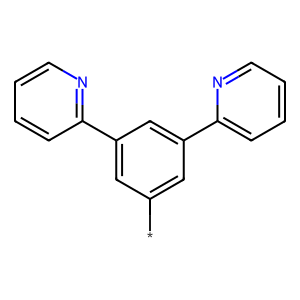

In [184]:
base_smile = 'C1=C(C2=NC=CC=C2)C=C(C2=CC=CC=N2)C=C1(*)'
display_smile(base_smile)

In [201]:
psuedohalogens = ['F', 'Cl', 'Br', 'I', 'C#N', 'N=C=S', 'C(=O)O']

def make_mols(functional_groups, base_smile):
    for fg in functional_groups:
        smile = base_smile.replace('*', fg)
        mol = Chem.MolFromSmiles(smile)
        yield mol

x_F, x_Cl, x_Br, x_I, x_CN, x_SCN, anchor = make_mols(psuedohalogens, base_smile) 
molecules = (x_F, x_Cl, x_Br, x_I, x_CN, x_SCN, anchor)
mol_names = ('X-F', 'X-Cl', 'X-Br', 'X-I', 'X-CN', 'X-SCN', 'Ti-anchor')
df = pd.DataFrame({'name':mol_names, 'molecule':molecules})

# Molecules Synthecized

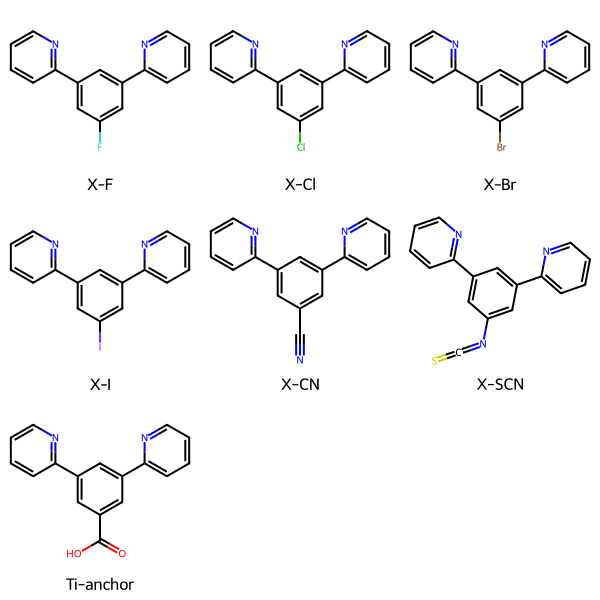

In [202]:
Chem.Draw.MolsToGridImage(molecules, 
                          subImgSize=(200,200),
                          legends=list(df['name']))

# Full Dye molecule

In [204]:
Chem.FindPotentialStereo(anchor)